In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [4]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)

df["flower_num"] = iris.target
df["flower_cat"] = df["flower_num"].apply(lambda x: iris.target_names[x]) 

print("Dataset shape = {}".format(df.shape))
df.sample(10)

Dataset shape = (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_num,flower_cat
134,6.1,2.6,5.6,1.4,2,virginica
26,5.0,3.4,1.6,0.4,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor
84,5.4,3.0,4.5,1.5,1,versicolor
69,5.6,2.5,3.9,1.1,1,versicolor
38,4.4,3.0,1.3,0.2,0,setosa
122,7.7,2.8,6.7,2.0,2,virginica
27,5.2,3.5,1.5,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
42,4.4,3.2,1.3,0.2,0,setosa


In [7]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
flower_num             int32
flower_cat            object
dtype: object

- The scale of the features is not so different

In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- The distribution of some features is gaussian-like
- The target feature is well balanced

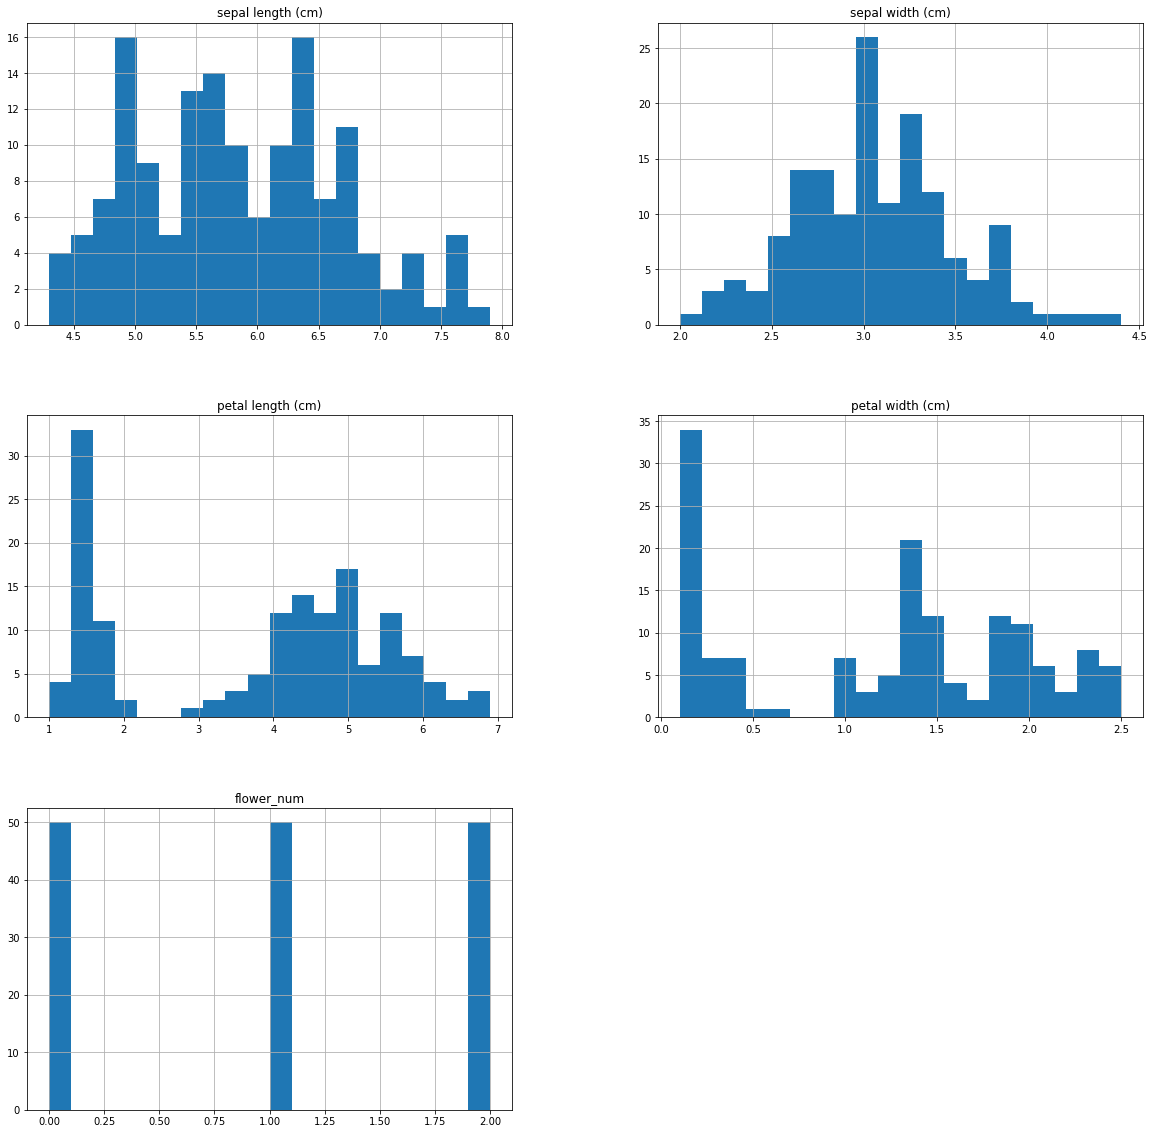

In [5]:
import matplotlib.pyplot as plt

df.hist(figsize=(20,20), bins=20)
plt.show()

- Petal width and petal length are strongly correlated between them
- Petal width and petal length are strongly correlated with the target 

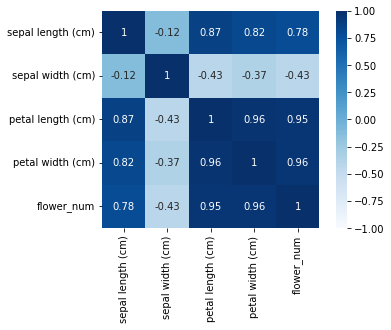

In [6]:
corr = df.corr("pearson")

import seaborn as sns

sns.heatmap(data=corr, cmap='Blues', center=0, cbar=True, vmin=-1, vmax=1, square=True, annot = True)
plt.show()

In [7]:
df.describe(include="object")

,flower_cat
count,150
unique,3
top,setosa
freq,50


- It can be seen that petal length or petal width classifies correctly the flower type by themselves.

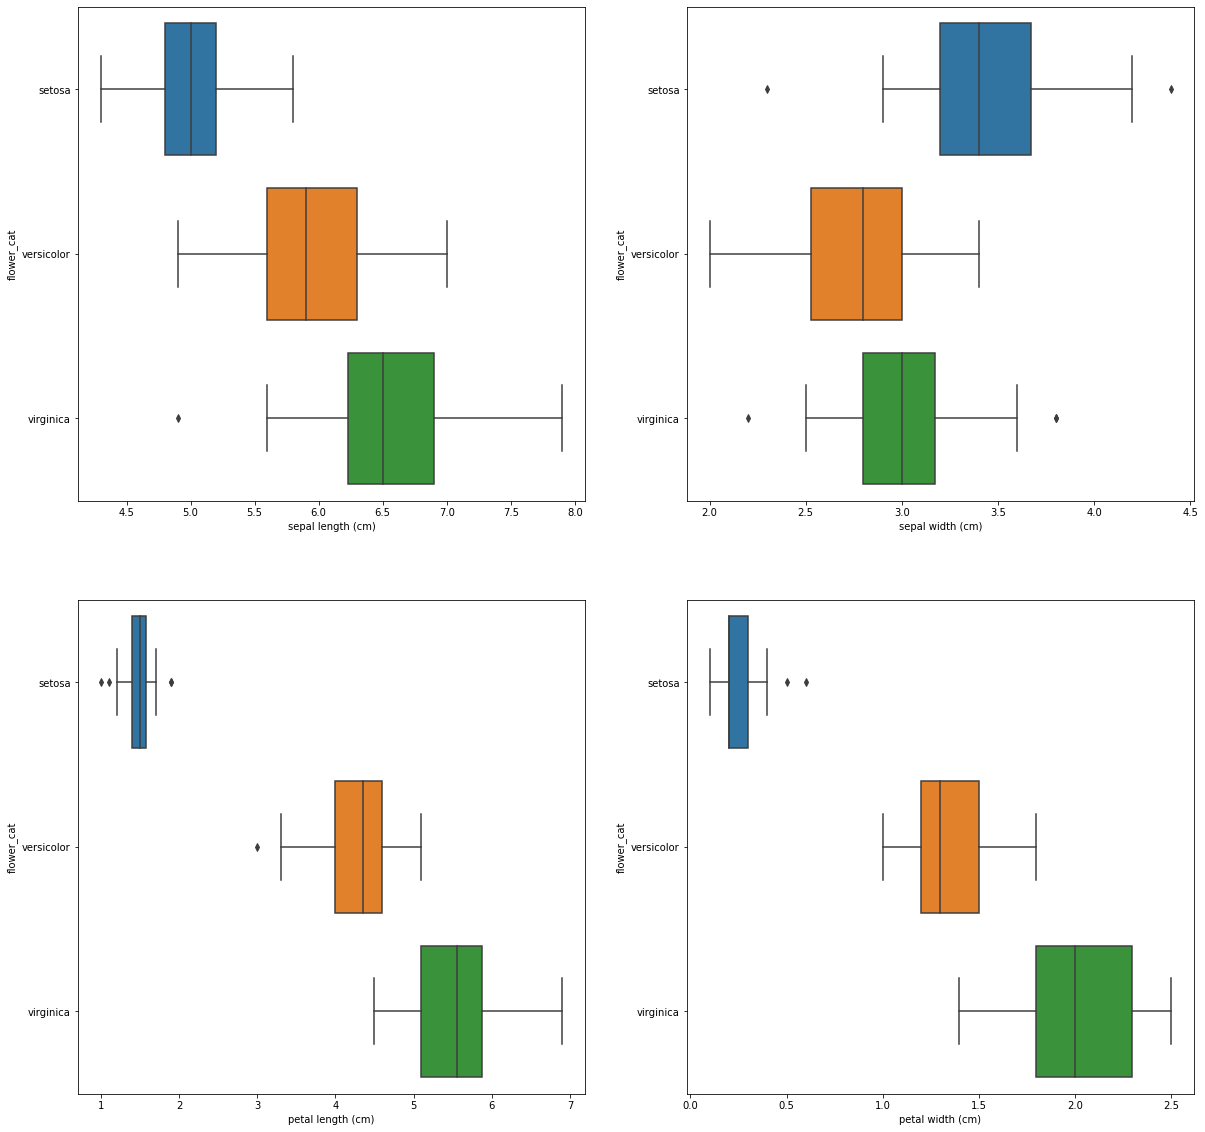

In [8]:
num_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']

fig, ax =plt.subplots(2,2, figsize=(20,20))

k = 0
for i in range(2):
    for j in range(2):        
        bp = sns.boxplot(y = df['flower_cat'], x = num_cols[k], data=df, ax=ax[i][j])
        #bp.set_xscale("log")
        k = k + 1

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(["flower_num","flower_cat"], axis = 1)
y = df["flower_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Pre-processing 

In [48]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test  = ss.transform(X_test)

### Models to implement 

- SVC
- Logistic Regression
- Random Forest Classifier
- KNN
- NN

### Just for understand how GridSearchCV works

In [10]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel = "rbf", C=30, gamma = "auto")
# It trains the model and returns the score in the validation set
cross_val_score(model, X_train, y_train, cv=5)

# We can tune the hyper parameters using cross_val_score
# This method can be used to find the best hyper-parameters
# After that, the final model will be trained (using the best hyper-params)
kernels = ["rbf", "linear"]
C = [1,10,20,50]
avg_scores = {}

# Manual implementation of GridSearchCV
for kval in kernels:
    for cval in C:
        model = SVC(kernel=kval, C=cval, gamma="auto")
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        print(cv_scores)
        avg_scores[kval  + "_" + str(cval)] = np.average(cv_scores)

[1.         1.         0.95238095 1.         0.9047619 ]
[1.         1.         0.95238095 1.         0.9047619 ]
[1.         1.         0.95238095 1.         0.85714286]
[1.         0.95238095 0.95238095 0.95238095 0.85714286]
[1.         0.95238095 0.95238095 1.         0.9047619 ]
[1.         1.         0.95238095 1.         0.85714286]
[1.         0.95238095 0.95238095 0.95238095 0.85714286]
[1.         0.95238095 0.95238095 0.95238095 0.85714286]


In [11]:
avg_scores

{'rbf_1': 0.9714285714285715,
 'rbf_10': 0.9714285714285715,
 'rbf_20': 0.9619047619047618,
 'rbf_50': 0.9428571428571427,
 'linear_1': 0.9619047619047618,
 'linear_10': 0.9619047619047618,
 'linear_20': 0.9428571428571427,
 'linear_50': 0.9428571428571427}

### Method 1: Tuning hyper-parameters 

In [14]:
from sklearn.model_selection import GridSearchCV

model = SVC()

C           = list(np.linspace(1,100,5))
kernel      = ["rbf", "sigmoid"]
gamma       = ["scale","auto"]
param_dict  = dict(C=C, kernel=kernel,gamma=gamma)

clf = GridSearchCV(model, param_dict , cv=10, return_train_score=True)

clf.fit(X,y)
clf.cv_results_

# dir(clf) 
# clf.best_params_

{'mean_fit_time': array([0.00118544, 0.00172822, 0.00093429, 0.00139992, 0.00099986,
        0.0016222 , 0.00089984, 0.00139561, 0.00093808, 0.0016407 ,
        0.00100002, 0.00179963, 0.00106146, 0.00156379, 0.0009377 ,
        0.0014998 , 0.00100722, 0.00141153, 0.00100131, 0.00150239]),
 'std_fit_time': array([3.75012985e-04, 4.20692026e-04, 1.94727009e-04, 4.89558228e-04,
        3.48295191e-06, 5.11720946e-04, 2.99946564e-04, 4.84193024e-04,
        3.49462323e-04, 5.31918809e-04, 3.06476859e-06, 3.99204196e-04,
        1.71112649e-04, 4.69451922e-04, 1.85429703e-04, 5.01302628e-04,
        1.63407022e-05, 4.81572341e-04, 2.54963005e-06, 5.00969261e-04]),
 'mean_score_time': array([0.00093002, 0.00060036, 0.00069954, 0.00069625, 0.0003989 ,
        0.00067847, 0.00060015, 0.00070839, 0.00070081, 0.00068762,
        0.0006597 , 0.00059583, 0.00040774, 0.00080061, 0.00063963,
        0.0007    , 0.00065992, 0.00078971, 0.0005008 , 0.00049894]),
 'std_score_time': array([0.00023964, 

In [15]:
df = pd.DataFrame(clf.cv_results_)

COLUMNS = df.shape[1]
pd.set_option('display.max_columns', COLUMNS)

df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [16]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001185,0.000375,0.000930,0.000240,1.0,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",1.0,0.933333,1.000000,1.000000,1.000000,0.933333,0.933333,0.933333,1.0,1.000000,0.973333,0.032660,3,0.977778,0.977778,0.962963,0.977778,0.970370,0.977778,0.977778,0.977778,0.977778,0.962963,0.974074,0.005972
1,0.001728,0.000421,0.000600,0.000490,1.0,scale,sigmoid,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.0,0.066667,0.133333,0.200000,0.000000,0.000000,0.133333,0.066667,0.0,0.066667,0.066667,0.066667,11,0.081481,0.037037,0.066667,0.059259,0.081481,0.081481,0.066667,0.074074,0.081481,0.074074,0.070370,0.013354
2,0.000934,0.000195,0.000700,0.000458,1.0,auto,rbf,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}",1.0,0.933333,1.000000,1.000000,1.000000,0.933333,0.933333,1.000000,1.0,1.000000,0.980000,0.030551,1,0.985185,0.985185,0.985185,0.985185,0.985185,0.992593,0.992593,0.977778,0.992593,0.977778,0.985926,0.005185
3,0.001400,0.000490,0.000696,0.000456,1.0,auto,sigmoid,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.0,0.333333,0.066667,0.133333,0.000000,0.000000,0.066667,0.000000,0.0,0.000000,0.060000,0.100885,12,0.044444,0.333333,0.029630,0.029630,0.044444,0.044444,0.037037,0.044444,0.044444,0.044444,0.069630,0.088095
4,0.001000,0.000003,0.000399,0.000489,25.75,scale,rbf,"{'C': 25.75, 'gamma': 'scale', 'kernel': 'rbf'}",1.0,0.933333,1.000000,1.000000,0.866667,1.000000,0.933333,1.000000,1.0,1.000000,0.973333,0.044222,3,0.970370,0.985185,0.977778,0.970370,0.992593,0.985185,0.992593,0.970370,0.970370,0.970370,0.978519,0.009042


In [17]:
df = df[["params","mean_train_score","mean_test_score"]]
df = df.sort_values(by = ["mean_test_score","mean_train_score"], ascending = False)
df.head()

,params,mean_train_score,mean_test_score
2,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}",0.985926,0.980000
12,"{'C': 75.25, 'gamma': 'scale', 'kernel': 'rbf'}",0.983704,0.980000
16,"{'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.982222,0.973333
4,"{'C': 25.75, 'gamma': 'scale', 'kernel': 'rbf'}",0.978519,0.973333
0,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.974074,0.973333


### Method 2: Tuning hyper-parameters 

In [19]:
from sklearn.model_selection import RandomizedSearchCV

C=list(np.linspace(1,1000,1000))
kernel = ["linear", "poly", "rbf", "sigmoid"]
gamma=["scale","auto"]
param_dict = dict(C=C, kernel=kernel,gamma=gamma)

cl = SVC()
rs = RandomizedSearchCV(estimator = cl, param_distributions = param_dict, cv=5, return_train_score=False, n_iter=2000)

rs.fit(X,y)

df = pd.DataFrame(rs.cv_results_)
df = df[["param_C","param_kernel","param_gamma","mean_test_score"]]
df = df.sort_values(by=["mean_test_score"],axis=0,ascending=False)
df.head()

,param_C,param_kernel,param_gamma,mean_test_score
496,7.0,rbf,scale,0.986667
1215,8.0,rbf,scale,0.986667
1359,4.0,rbf,auto,0.986667
843,15.0,rbf,scale,0.980000
114,9.0,rbf,auto,0.980000


In [20]:
rs.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 7.0}

# Final tuning (using training dataset)
### Method 1: Tuning Hyperparametres / using dictionary 

In [87]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    "svm" : {
        "model" : SVC(),
        "params" : {
            "C"         : list(np.linspace(1,100,20)),
            "kernel"    : ["linear", "poly", "rbf", "sigmoid"],
            "gamma"     : ["scale","auto"]
        }
    },
    "random_forest":{
        "model": RandomForestClassifier(),
        "params" : {
            "n_estimators"      : [i+10 for i in range(100)],
            "criterion"         : ["gini", "entropy"],
            "min_samples_leaf"  : [i+1 for i in range(20)]
        }
    },
    "logistic_regression" : {
        "model"     : LogisticRegression(solver="liblinear", multi_class="auto"),
        "params"    : {
            "C"     : list(np.linspace(1,100,100))
        }
    }
}

In [102]:
scores = []

from sklearn.metrics import accuracy_score
import numpy as np

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False, scoring='accuracy')
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    mts = clf.cv_results_
    mts = mts.get("mean_test_score")
    mts = np.mean(mts)  

    scores.append({
        'model': model_name,
        "best_mean_accuracy_in_training" :mts,
        "best_accuracy_in_testing" :acc,
        "best_params": clf.best_params_
    })

In [103]:
df = pd.DataFrame(scores, columns = ["model","best_mean_accuracy_in_training", "best_accuracy_in_testing", "best_params"])
df = df.sort_values(by = ["best_accuracy_in_testing", "best_mean_accuracy_in_training"], ascending = False)
df.head()

,model,best_mean_accuracy_in_training,best_accuracy_in_testing,best_params
1,random_forest,0.938545,0.977778,"{'criterion': 'gini', 'min_samples_leaf': 8, '..."
0,svm,0.924821,0.977778,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}"
2,logistic_regression,0.950571,0.911111,{'C': 9.0}


# Method 2: Tuning Hyperparameters / using dictionary

In [100]:
scores = []

from sklearn.metrics import accuracy_score
import numpy as np

for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(estimator = mp["model"], param_distributions = mp["params"], cv=5, return_train_score=False, n_iter=50, scoring='accuracy')
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    mts = clf.cv_results_
    mts = mts.get("mean_test_score")
    mts = np.mean(mts)  

    scores.append({
        'model': model_name,
        "best_mean_accuracy_in_training" :mts,
        "best_accuracy_in_testing" :acc,
        "best_params": clf.best_params_
    })

In [101]:
df = pd.DataFrame(scores, columns = ["model","best_mean_accuracy_in_training", "best_accuracy_in_testing", "best_params"])
df = df.sort_values(by = ["best_accuracy_in_testing", "best_mean_accuracy_in_training"], ascending = False)
df.head()

,model,best_mean_accuracy_in_training,best_accuracy_in_testing,best_params
1,random_forest,0.939429,0.977778,"{'n_estimators': 105, 'min_samples_leaf': 17, ..."
0,svm,0.927619,0.977778,"{'kernel': 'linear', 'gamma': 'auto', 'C': 6.2..."
2,logistic_regression,0.949714,0.955556,{'C': 58.0}
